## Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

- numerical.csv ! 

### Instructions


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Get the numerical variables from our dataset.



In [102]:
#Importing numerical file

numerical = pd.read_csv('numerical-Copy1.csv')

display("Numerical shape: ", numerical.shape)

'Numerical shape: '

(9134, 8)

#### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.



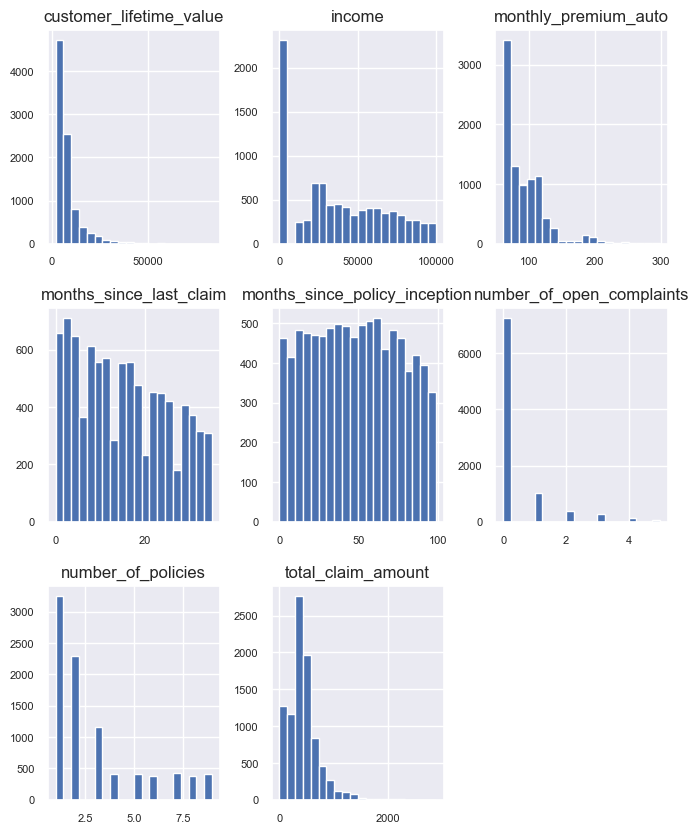

In [103]:
def plot_numerical(x):
    
    x.hist(figsize=(8,10), bins=20, xlabelsize=8, ylabelsize=8)
    
plot_numerical(numerical)

None of them shows a normal distribution of its data. Customer_lifetime_value, monthly_premium_auto, number_of_open_complaints, number_of_policies or total_claim_amount seem to fall under some sort of exponential distribution, but the range of their values for most of the variables is not enough spread to assure that. 

#### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [107]:
# Checking with log-transformations

In [157]:
def log_transform_clean(df):
    
    for col in df:
        array = df[col]
        log_tr = np.log(array)

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        sns.histplot(ax=axes[0], data=array)
        axes[0].set_title(col + " (original data)")
        sns.histplot(ax=axes[1], data=log_tr, color='purple')
        axes[1].set_title(col + " (log transformed)")

        plt.show()
    

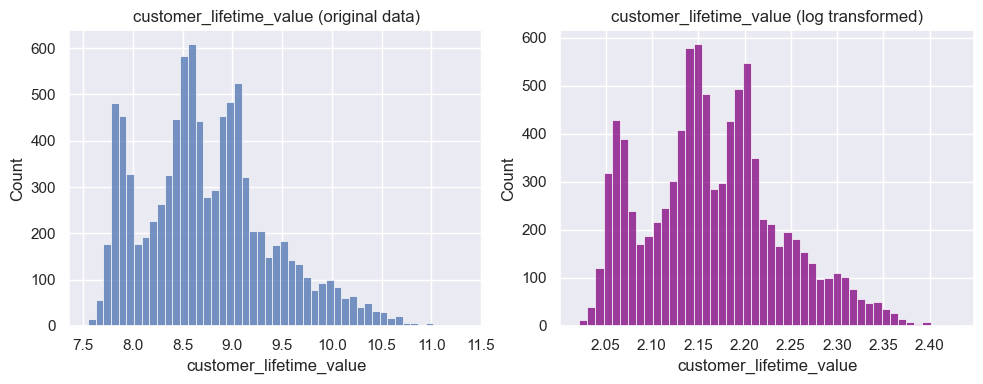

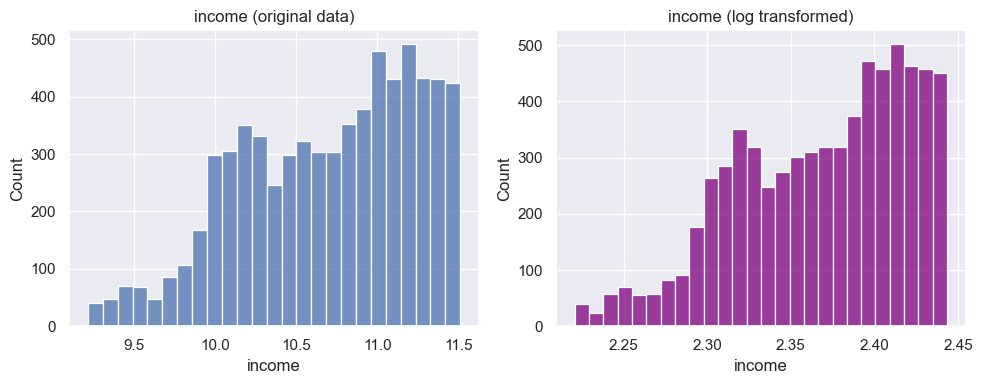

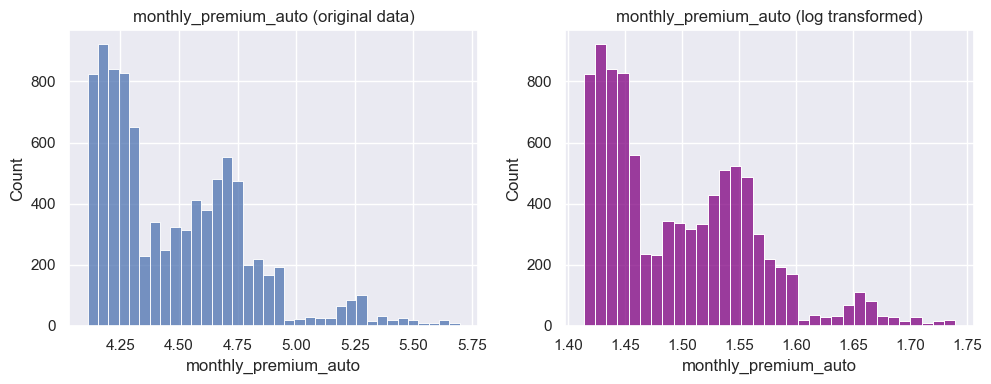

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


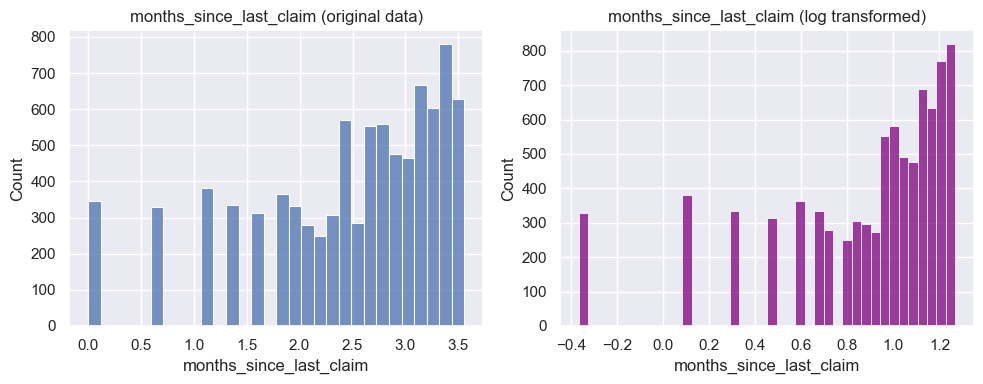

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


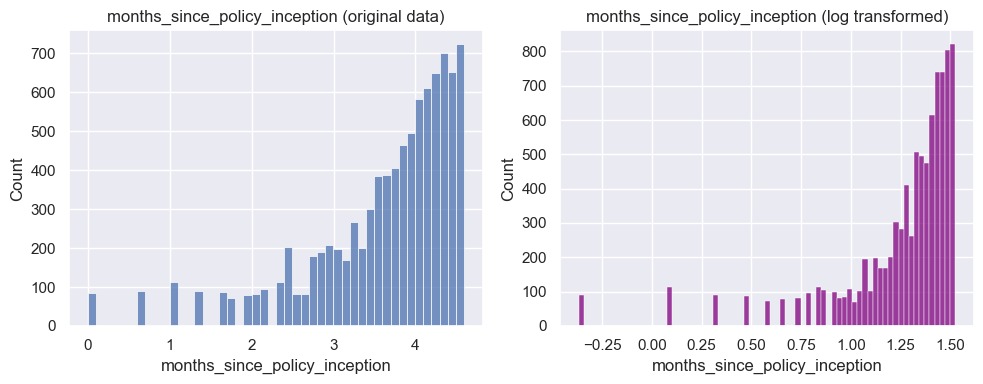

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


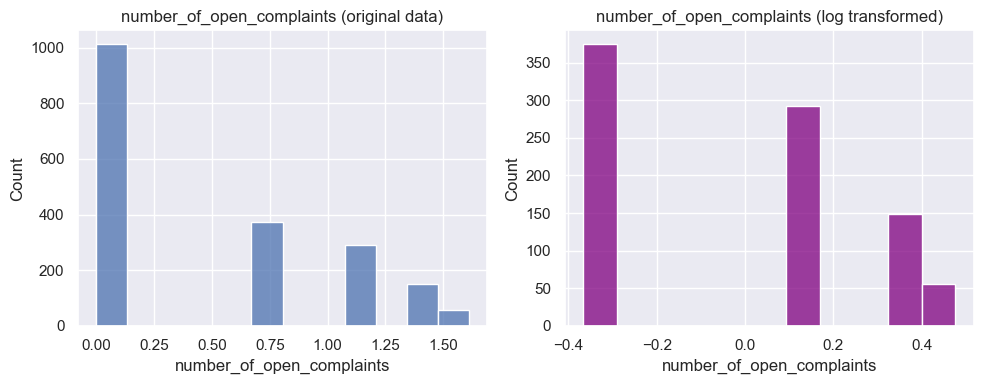

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


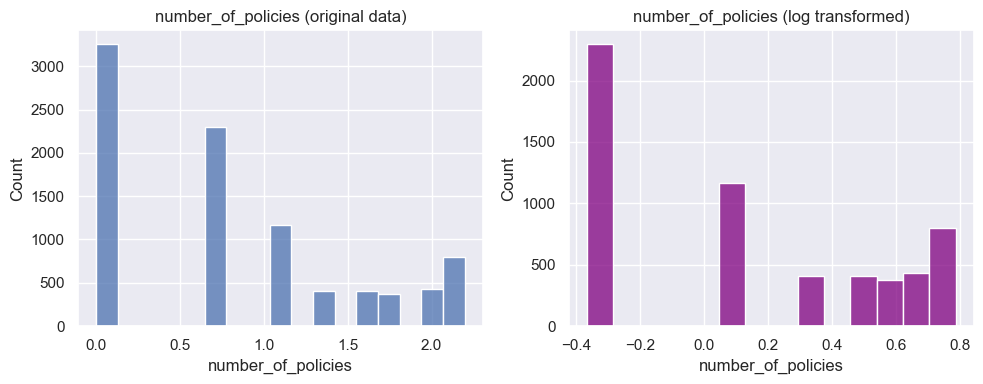

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


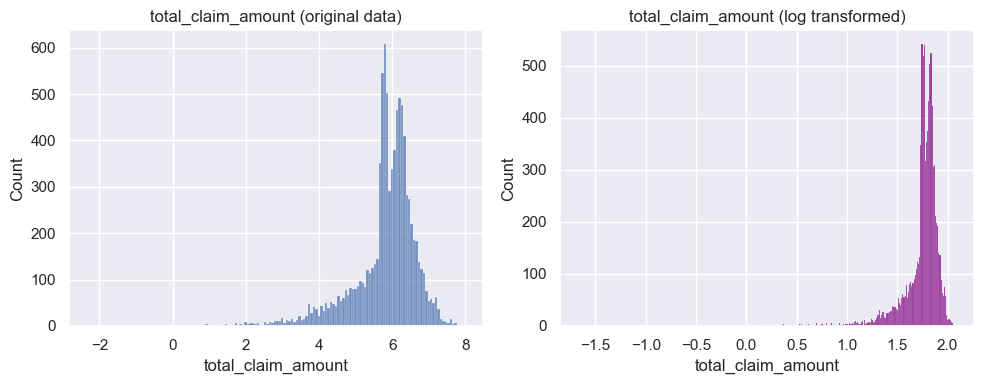

In [158]:
log_transform_clean(numerical)

No major transformations occur after log transform.

In [ ]:
# Checking with normalized numerical data

In [181]:
from sklearn.preprocessing import MinMaxScaler

def minmax_transform_clean(df):
    scaler = MinMaxScaler()
    for col in df:
        array = df[col]
        array_scaled = scaler.fit_transform(array.values.reshape(-1, 1))

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        sns.histplot(ax=axes[0], data=array)
        axes[0].set_title(col + " (original data)")
        sns.histplot(ax=axes[1], data=array_scaled, color="green")
        axes[1].set_title(col + " (min-max scaled)")

        plt.show()


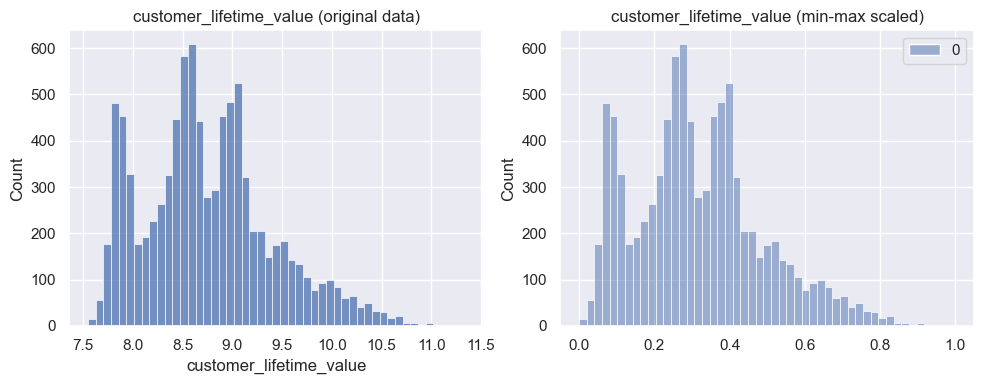

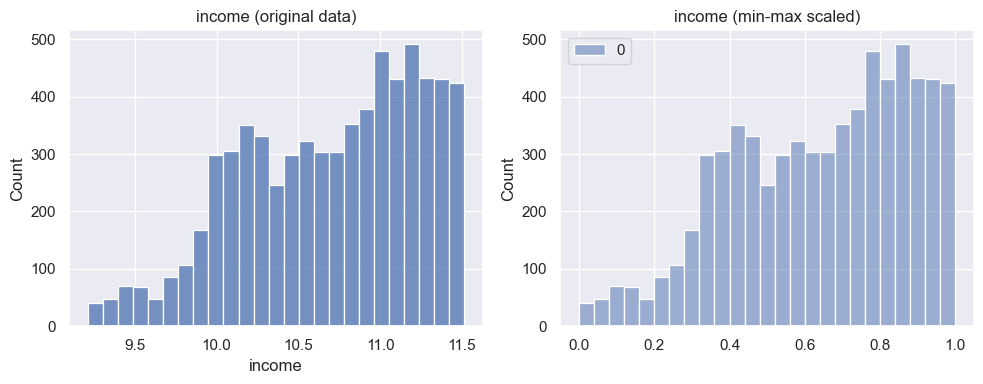

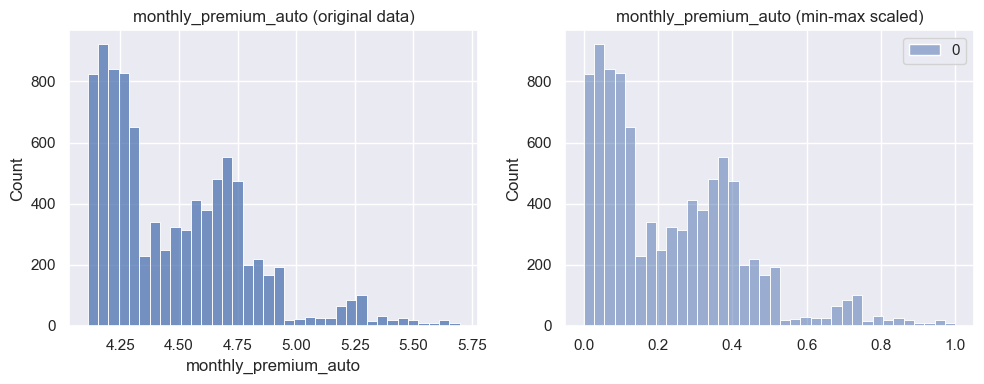

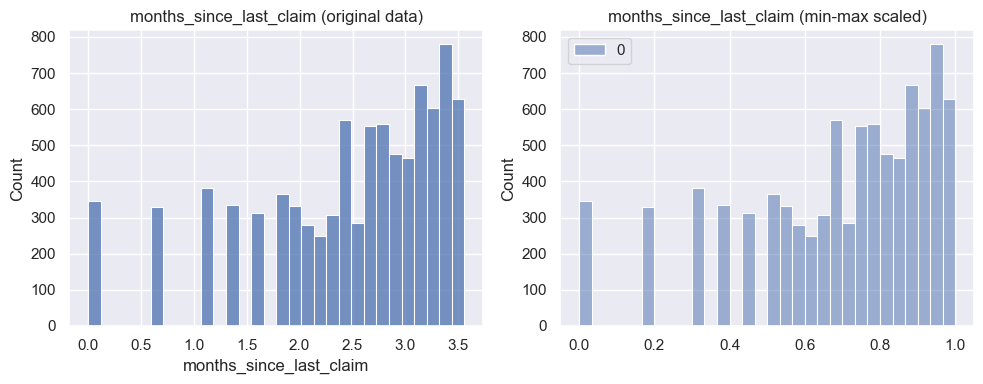

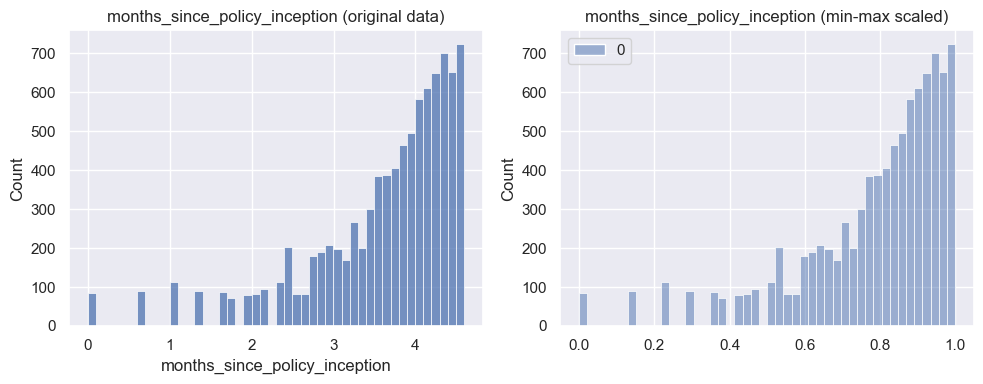

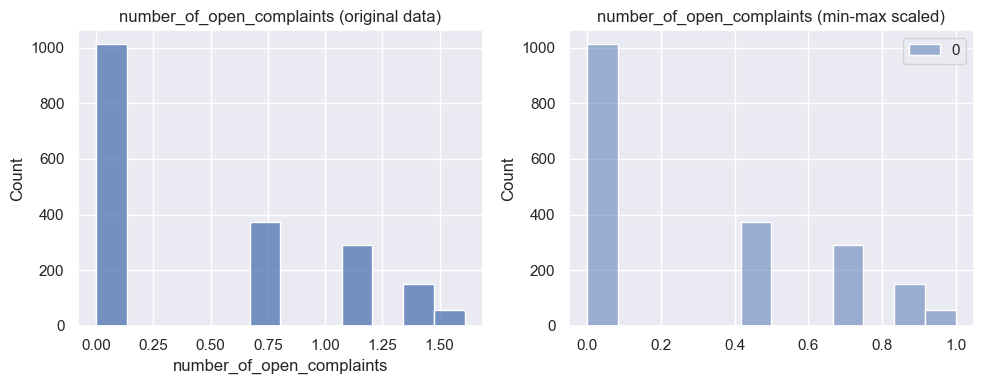

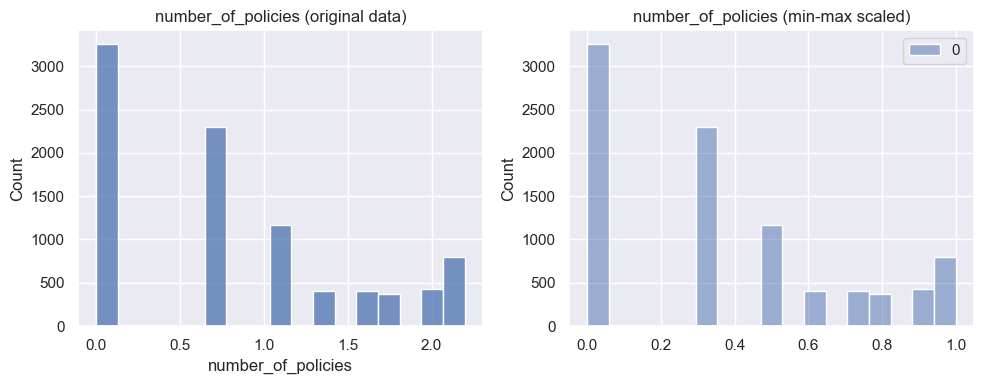

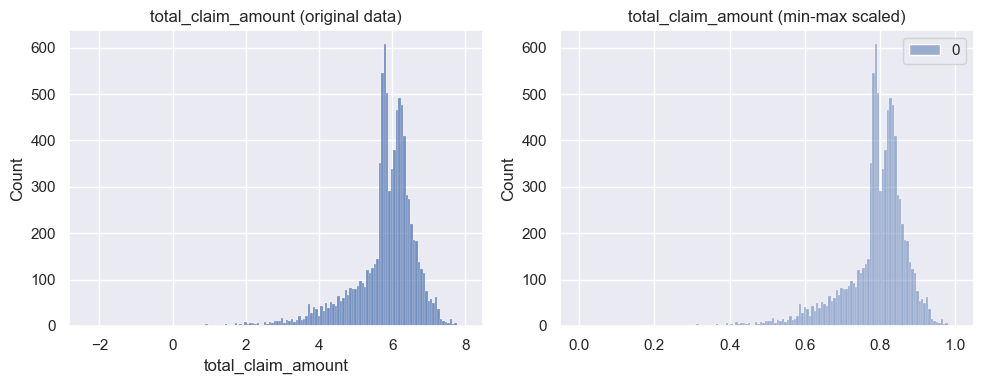

In [182]:
minmax_transform_clean(numerical)

Distribution data remains equal after normalizing it.

In [183]:
# Checking changes after deleting outliers

In [177]:
def outliers_clean(df):
    
    for col in df:
        array = df[col]
        q1 = np.percentile(array, 25)
        q3 = np.percentile(array, 75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        sns.histplot(ax=axes[0], data=array)
        axes[0].set_title(col + " (original)")
        sns.histplot(ax=axes[1], data=array[array <= upper], color="orange")
        axes[1].set_title(col + " (without outliers)")

        plt.show()

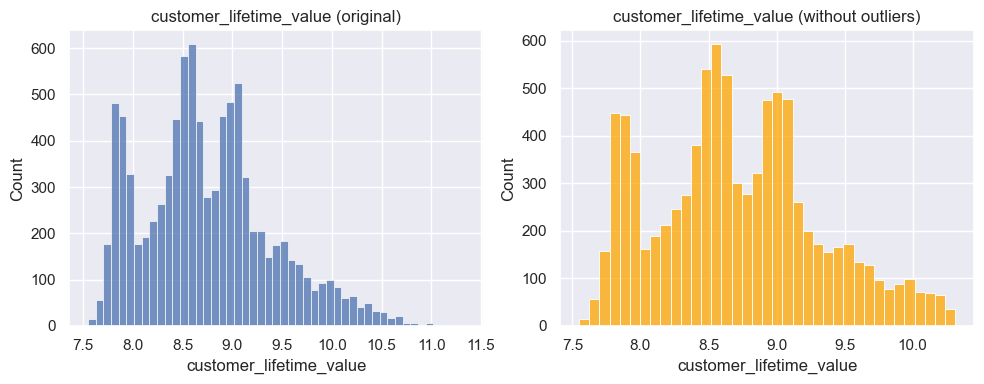

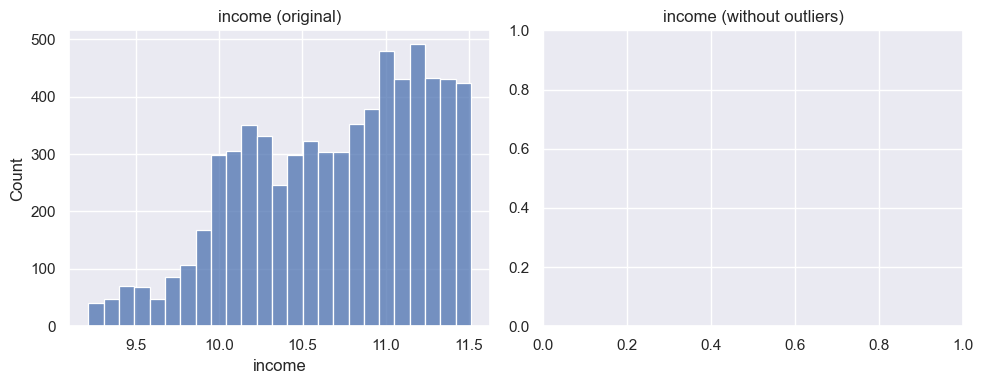

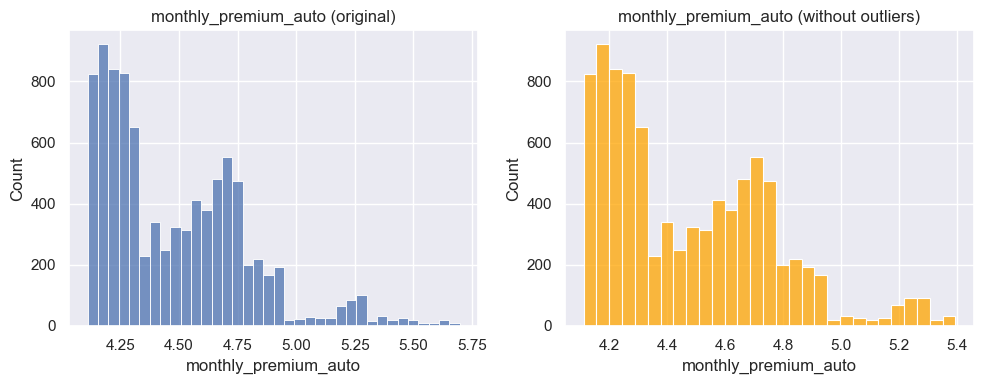

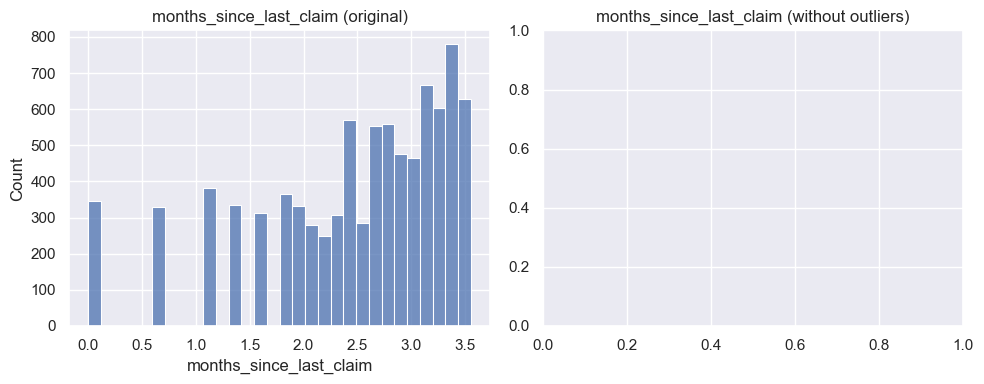

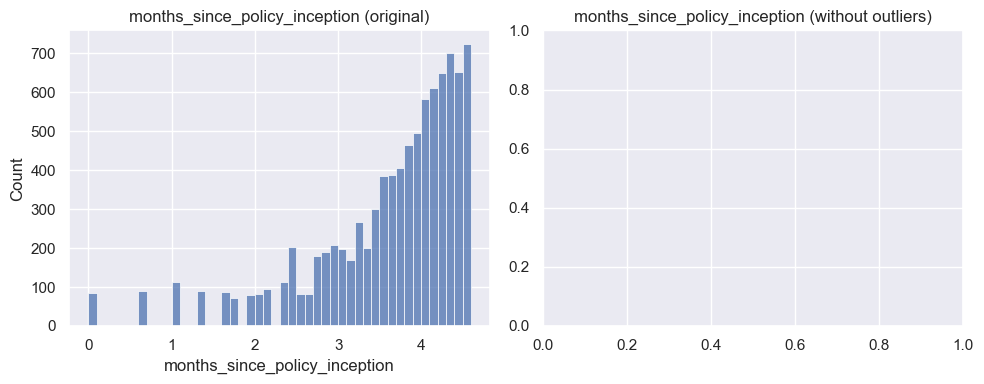

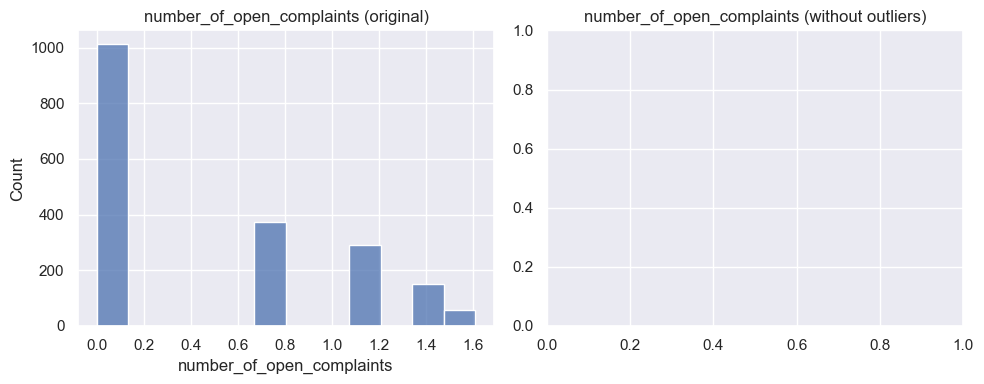

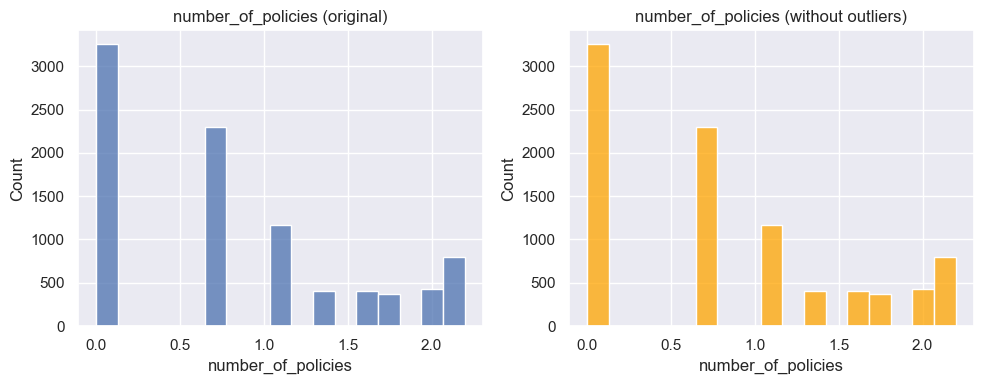

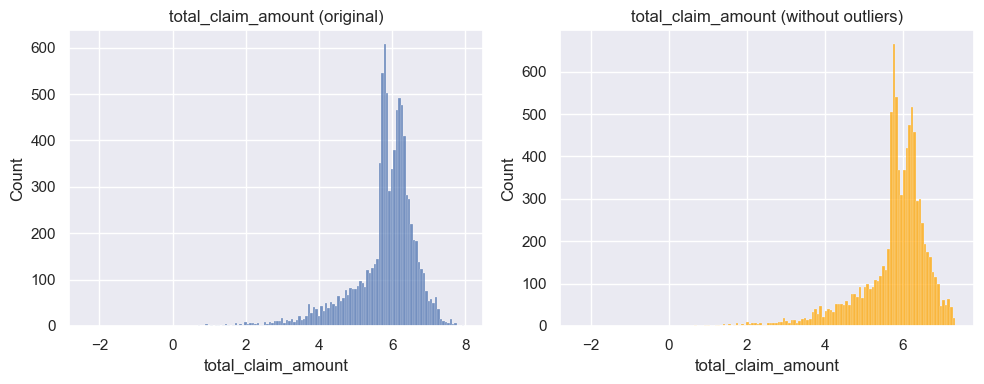

In [178]:
outliers_clean(numerical)

Not significant changes after dealing with outliers. Only in 'customer lifetime value' can we observe now that its data slightly tend towards a normal distribution (if we don't take into account those three huge peaks).